# 💡이디야는 진짜로 스타벅스를 따라다닐까?

## 👣 1. 스타벅스 매장 데이터 확보

In [2]:
# requirements

from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from urllib.request import urlopen
from tqdm import tqdm_notebook
from matplotlib import font_manager, rc
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import platform

plt.rcParams["axes.unicode_minus"] = False
rc("font", family= "Malgun Gothic")
%matplotlib inline

In [3]:
# 스타벅스 매장 페이지
driver = webdriver.Chrome(executable_path="../../drive/chromedriver.exe")
driver.get("https://www.starbucks.co.kr/store/store_map.do")

In [4]:
first_content = driver.find_element(By.CSS_SELECTOR, '#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a')
first_content.click()
time.sleep(2)

In [5]:
second_content = driver.find_element(By.CSS_SELECTOR, '#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a')
second_content.click()
time.sleep(2)

In [6]:
third_content = driver.find_element(By.CSS_SELECTOR, '#mCSB_2_container > ul > li:nth-child(1) > a')
third_content.click()
time.sleep(2)

In [ ]:
# 페이지 전체 html 코드
html = driver.page_source

In [ ]:
# 가져온 html 코드 구분
soup = BeautifulSoup(html, 'html.parser')

In [9]:
# 스타벅스 매장 수, 코드 확인
starbucks_soup_list = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(starbucks_soup_list), starbucks_soup_list[0]

(599,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [10]:
# 스타벅스 매장명, 주소, 구 확인
sb_name = starbucks_soup_list[0].find("strong").text.strip()
sb_address = starbucks_soup_list[0].find(class_="result_details").text.strip()[:-9]
sb_address_gu = sb_address.split(" ")[1]
sb_name, sb_address, sb_address_gu

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [ ]:
# 스타벅스 서울 모든 매장명, 주소, 구 추출

sb_list = []

for item in starbucks_soup_list:
    sb_name = item.find("strong").text.strip()
    sb_address = item.find(class_="result_details").text.strip()[:-9]
    sb_address_gu = sb_address.split(" ")[1]
    
    sb = {
        "매장명" : sb_name,
        "주소" : sb_address,
        "구" : sb_address_gu
    }
    sb_list.append(sb)
    
# sb_list    

In [12]:
# 스타벅스 DataFrame

df_starbucks = pd.DataFrame(sb_list, columns = ["매장명", "주소", "구"])
df_starbucks.tail()

,매장명,주소,구
594,사가정역,서울특별시 중랑구 면목로 310,중랑구
595,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구
596,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구
597,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구
598,중화역,서울특별시 중랑구 봉화산로 35,중랑구


In [13]:
# set : 중복 제거
# 구 리스트 확보

gu_list = list(set(df_starbucks["구"]))
gu_list

['도봉구',
 '노원구',
 '서대문구',
 '용산구',
 '서초구',
 '관악구',
 '양천구',
 '강동구',
 '금천구',
 '종로구',
 '강서구',
 '은평구',
 '송파구',
 '중구',
 '성동구',
 '성북구',
 '마포구',
 '영등포구',
 '동대문구',
 '강남구',
 '동작구',
 '강북구',
 '중랑구',
 '광진구',
 '구로구']

## 👣 2. 이디야 매장 데이터 확보

In [14]:
# 이디야 매장 페이지

driver.get("https://www.ediya.com/contents/find_store.html")

In [15]:
first_content = driver.find_element(By.CSS_SELECTOR, '#contentWrap > div.contents > div > div.store_search_pop > ul > li:nth-child(2) > a')
first_content.click()
time.sleep(2)

In [16]:
second_content = driver.find_element(By.CSS_SELECTOR, '#keyword')
second_content.click()
time.sleep(2)

In [17]:
driver.find_element(By.CSS_SELECTOR, '#keyword').click()
time.sleep(2)
driver.find_element(By.CSS_SELECTOR, '#keyword').clear()
time.sleep(2)
driver.find_element(By.CSS_SELECTOR, '#keyword').send_keys("서울 강서구")
time.sleep(2)
driver.find_element(By.CSS_SELECTOR, '#keyword_div > form > button').click()
time.sleep(2)

In [ ]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
# soup.head()

In [19]:
ediya_soup_list = soup.find(id = "placesList").find_all("li", class_='item')
ediya_soup_list[0]

<li class="item"><a href="#c" onclick="panLatTo('0','0','0');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>가양역점</dt> <dd>서울 강서구 양천로 500 (등촌동)</dd></dl></a></li>

In [20]:
# 이디야 매장명, 주소, 구 확인 

ed_name = ediya_soup_list[0].find("dt").text.strip()
ed_address = ediya_soup_list[0].find("dd").text.strip()
ed_address_gu = ed_address.split(" ")[1]

ed_name, ed_address, ed_address_gu

('가양역점', '서울 강서구 양천로 500 (등촌동)', '강서구')

In [ ]:
# 이디야 서울 모든 매장명, 주소, 구 추출

ed_list = []

for gu in tqdm_notebook(gu_list):
    
    driver.find_element(By.CSS_SELECTOR, '#keyword').click()
    time.sleep(0.5)
    driver.find_element(By.CSS_SELECTOR, '#keyword').clear()
    time.sleep(0.5)
    driver.find_element(By.CSS_SELECTOR, '#keyword').send_keys("서울 " + gu)
    time.sleep(0.5)
    driver.find_element(By.CSS_SELECTOR, '#keyword_div > form > button').click()
    time.sleep(0.5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    ediya_soup_list = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in ediya_soup_list:
        ed_name = item.find("dt").text.strip()
        ed_address = item.find("dd").text.strip()
        ed_address_gu = ed_address.split(" ")[1]

        ed = {
            "매장명" : ed_name,
            "주소" : ed_address,
            "구" : ed_address_gu
        }
        ed_list.append(ed)
    
# len(ed_list), ed_list    

In [22]:
driver.quit()
# 이디야 DataFrame

df_ediya = pd.DataFrame(ed_list)
df_ediya.tail()

,매장명,주소,구
704,신도림메르디앙점,"서울 구로구 신도림로 65 (신도림동, 신도림월드메르디앙오피스텔)",구로구
705,신도림테크노마트점,서울 구로구 새말로 97 (구로동),구로구
706,오류남부점,서울 구로구 오류로8길 65 (오류동),구로구
707,오류북부역점,서울 구로구 경인로20길 6 (오류동),구로구
708,천왕이펜하우스점,서울 구로구 천왕로 36 (천왕동),구로구


## 👣 3. 스타벅스, 이디야 데이터 시각화 및 분석

In [23]:
df_starbucks.rename(columns={"매장명" : "스타벅스매장", "주소" : "스타벅스주소"}, inplace=True)
df_ediya.rename(columns={"매장명" : "이디야매장", "주소" : "이디야주소"}, inplace=True)

starbucks_count = []
for item in gu_list:
    n = len(df_starbucks.loc[df_starbucks['구']==item])
    data = {
        "구" : item,
        "스타벅스 매장 수" : n
    }
    starbucks_count.append(data)

df_starbucks_count = pd.DataFrame(starbucks_count)
df_starbucks_count.head()

,구,스타벅스 매장 수
0,도봉구,4
1,노원구,14
2,서대문구,22
3,용산구,25
4,서초구,48


In [24]:
ediya_count = []
for item in gu_list:
    n = len(df_ediya.loc[df_ediya["구"]==item])
    dict = {
        "구" : item,
        "이디야 매장 수" : n
    }
    ediya_count.append(dict)
df_ediya_count = pd.DataFrame(ediya_count)
df_ediya_count.head()

,구,이디야 매장 수
0,도봉구,24
1,노원구,30
2,서대문구,20
3,용산구,14
4,서초구,29


In [25]:
pop = pd.merge(df_starbucks_count, df_ediya_count)
pop["매장 수 차이"] = abs(pop["스타벅스 매장 수"] - pop["이디야 매장 수"])
pop["매장 수 차이"].describe()

count    25.000000
mean     13.280000
std       9.062376
min       0.000000
25%       9.000000
50%      14.000000
75%      16.000000
max      44.000000
Name: 매장 수 차이, dtype: float64

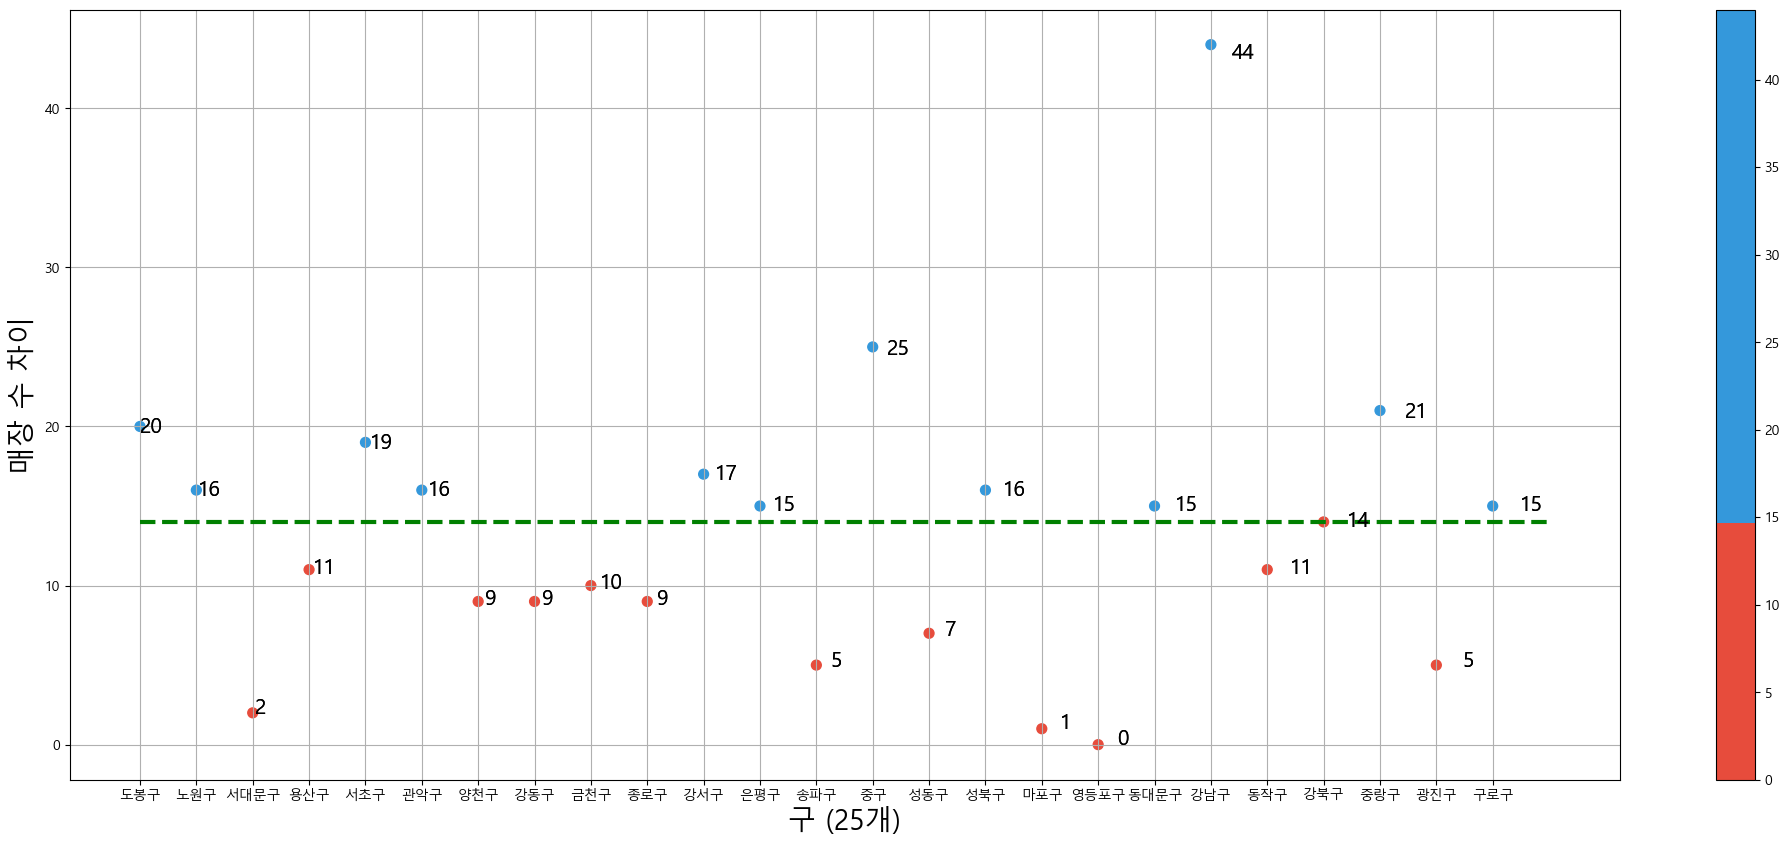

In [28]:
x = [0, len(pop["구"])]
y = [14 , 14]

color_step=["#e74c3c","#3498db","#3498db"]
my_cmap = ListedColormap(color_step)

plt.figure(figsize=(25, 10))
plt.scatter(pop["구"], pop["매장 수 차이"], c=pop["매장 수 차이"], s=50, cmap=my_cmap)
plt.plot(x, y, ls="dashed", lw=3, color="g")
for n in range(len(pop.index)):
    plt.text(
        pop.index[n]*1.02,
        pop["매장 수 차이"][n]*0.98,
        pop["매장 수 차이"][n],
        fontsize=15  
    )
    
    plt.text(
        pop.index[n]*1.02,
        pop["매장 수 차이"][n]*0.98,
        pop["매장 수 차이"][n],
        fontsize=15   
    )
plt.xlabel("구 (25개)", fontsize=20)
plt.ylabel("매장 수 차이", fontsize=20)
plt.colorbar()
plt.grid()
plt.show()

## **분석결과**
이디야커피가 스타벅스 매장 근처에 따라 짓는다는 얘기를 듣고 두 매장 위치 데이터를 분석해보았다.
분석 결과 매장 수 차이의 50%나 되는 값을 기준으로 잡아도 서울시의 절반정도되는 구들의 매장 수 차이가 크게 벌어져 있었다.
아무래도 프렌차이즈화 된 비즈니스의 입장에선 사람들이 많이 드나드는 곳에 매장을 짓는 것은 당연할 수 밖에 없다.
그럼에도 불구하고 50%정도밖에 비슷한 위치에 위치하는 것은 전혀 따라 짓는 것으로 보여지지 않는다.
따라서 위 데이터를 토대로 이디야 커피가 스타벅스 매장 근처에 따라 짓는다는 것은 사실이 아니라고 생각한다.